# Task 1: Population Dynamics in Ecosystems

## 1 (a):

To Model this dynamical system using matrix equations by writing the population of rabbits and 
foxes at the current time step in a 2 × 1 vector 'p',

In [1]:
######################################################
#INDIVIDUAL TASK 1a. Population Dynamics in Ecosystems
######################################################

#Let p1 be the population of rabbits.
#    p2 be the population of Foxes.

#Assume,
p1 = 0.7
p2 = 0.3

#Total population accounts to 1. ie., p1 + p2 = 1

import numpy as np

p = np.array([[p1],[p2]]) #p in 2 x 1 matrix
print('p:\n', p)

p:
 [[0.7]
 [0.3]]


Then, The population change is expressed as,

New Rabbit Population = p1 + 0.05*p1 - 0.05*p2 = 1.05*p1 - 0.05*p2 and

New Fox Population    = p2 + 0.05*p1 - 0.08*p2 = 0.05*p1 + 0.92*p2


'A' is the matrix which encapsulates these population changes,

A = [[New Rabbit Population]

   [New Fox Population]]

In [2]:
A = np.array([[1.05,-0.05],[0.05,0.92]]) #A in 2 x 2 matrix
print('A:\n',A)

A:
 [[ 1.05 -0.05]
 [ 0.05  0.92]]


In [3]:
#So the next time step change in population would be
Next_p = A @ p
print('Next time step change:\n',Next_p)

Next time step change:
 [[0.72 ]
 [0.311]]


Here, 0.72 is the New Population on Rabbits and 0.311 is the New Population on Foxes in the next time step.

## 1 (b):

p:
Rabbits: 8000 
Foxes: 2000 

100th time step population:
Rabbits: 124232 
Foxes: 58301 



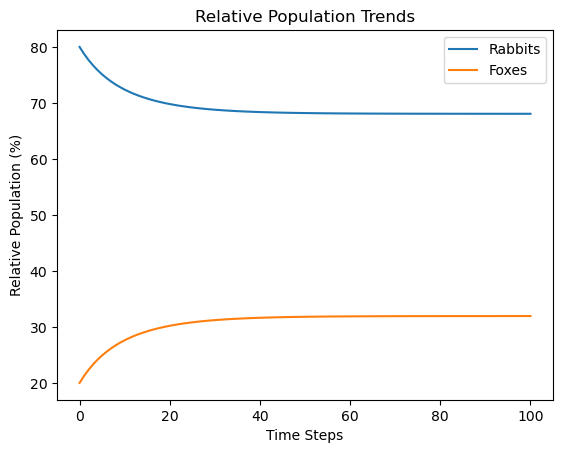

In [4]:
p1 = 8000
p2 = 2000
steps = 100

p = np.array([[p1],[p2]])
print('p:\nRabbits:', p[0,0],'\nFoxes:', p[1,0],'\n')

#iterating 100 time steps for the expected population
New_p = p
for i in range(steps):
    New_p = A @ New_p
    
print('100th time step population:\nRabbits:', round(New_p[0,0]),'\nFoxes:', round(New_p[1,0]),'\n')

#importing relevant libraries
import matplotlib.pyplot as plt

#Initializing Population over time matrix
Over_time = np.zeros((steps + 1, 2))
step = np.arange(steps + 1)
Over_time[0,:] = p.T
New_p = p

#Storing population data
for i in range (1,steps + 1):
    New_p = A @ New_p
    Over_time[i,:] = New_p.T

#Relative population Calculation
relativePopulation = Over_time / np.sum(Over_time, axis = 1, keepdims=True) * 100

#Relative populations over time plot
plt.figure()
plt.plot(step, relativePopulation[:, 0], label='Rabbits')
plt.plot(step, relativePopulation[:, 1], label='Foxes')
plt.legend()
plt.title('Relative Population Trends')
plt.xlabel('Time Steps')
plt.ylabel('Relative Population (%)')
plt.show()

The long-term distribution of fox and rabbit populations shows a steady trend of convergence towards an equilibrium state. The simulation shows how the rabbit population dominated over time, with an initial distribution of 80% rabbits and 20% foxes. The relative numbers stabilise in the face of possible changes, suggesting that the two species may cohabit in the ecosystem in a sustainable and balanced manner. This stability is consistent with the dynamics outlined in the matrix, wherein the benefits of fox predation appear to be outweighed by rabbits' faster rate of reproduction. The populations eventually settled into a stable and harmonic balance, demonstrating the endurance and stability of the simulated environment over time. This overall behaviour points to a self-regulating system.

## 1 (c):

In [5]:
#finding Eigen values
eig_values,eig_vectors = np.linalg.eig(A)
print('eigen values:', eig_values)

eigen values: [1.02653312 0.94346688]


The associated population-possibly the rabbit population in this instance-tends to stabilise around an equilibrium value as a result of the dynamics established in the system, according to the eigenvalue 1.0265, which is closer to 1.

A different tendency in the behaviour compared to the other species may be indicated by the eigenvalue 0.9435 (even further from 1), which may indicate a relatively less stable behaviour or influence on the associated population (perhaps the fox population).

These eigenvalues suggest that, in this habitat, the rabbit population may exhibit longer-term behavioural stability than the fox population. The dynamics of both populations are impacted by the interactions shown in matrix A, though, and their stability characteristics across time are reflected in the eigenvalues.

When an eigenvalue approaches 1, it suggests that the factor's impact on population dynamics is more steady. The eigenvalue in this instance, which is closer to 1 (about 1.0265), indicates the more dominant factor influencing population dynamics over the long term.

## 1 (d):

The population change is expressed as,

New Rabbit Population = p1 + 0.05*p1 - 2*p2 = 1.05*p1 - 2*p2 and

New Fox Population    = p2 + 0.05*p1 - 0.08*p2 = 0.05*p1 + 0.92*p2


In [6]:
New_A = np.array([[1.05,-2],[0.05,0.92]]) #New A 2 x 2 matrix
print('Modified A:\n',New_A)

Modified A:
 [[ 1.05 -2.  ]
 [ 0.05  0.92]]


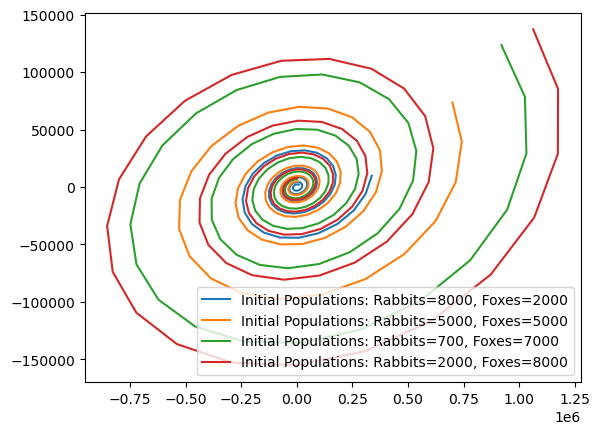

In [7]:
p_list = np.array([[8000,2000],[5000,5000],[700,7000],[2000,8000]]) #Different types of Initial population
steps = 100

#Storing and plotting the population change for all different type of initial population
plt.figure()
for j in range (0, p_list.shape[0]):
    newOver_time = np.zeros((steps + 1, 2))
    newOver_time[0,:] = p_list[j]
    Newer_p = p_list[j,:]
    label = "Initial Populations: Rabbits={}, Foxes={}".format(p_list[j,0], p_list[j,1])
    for i in range(1,steps + 1):
        Newer_p = New_A @ Newer_p
        newOver_time[i,:] = Newer_p
    
    plt.plot(newOver_time[:,0], newOver_time[:,1], label = label)
    
plt.legend()
plt.show()

Derived from the modified A matrix with a 200% decline in the rabbit population owing to predation, the population dynamics matrix raises significant questions and uncovers interesting patterns. At first, there are noticeable shifts in both the rabbit and fox populations, with the fox population growing while the rabbit population sharply declines. However, a deeper look reveals important problems with the model. In the long term, the trajectories imply unstable behaviour and the possibility of limitless development or decrease. Notably, the model's validity is called into question by the occurrence of negative rabbit populations at specific points, which adds a biologically impossible layer. The fact that the populations of foxes and rabbits have diverged over time highlights the lack of a stable equilibrium and points to ongoing expansion or decline. The model evaluation emphasises that in order to guarantee physiologically believable interactions, parameters must be carefully considered. Limitations are introduced by assuming constant percentages for population fluctuations, which calls for parameter adjustment to provide a more realistic picture of ecological dynamics. To sum up, the behaviour that has been observed demands a critical reevaluation of the model, offering opportunities for improvement, different techniques, or more complexity in order to properly represent the complexities of population dynamics in ecological systems.

# Task 2: Regression by Matrix Operations

## 2 (a):

X:
 [[1. 0.]
 [1. 3.]
 [1. 6.]]
y:
 [[1.]
 [4.]
 [5.]]
𝜷:
 [[1.33333333]
 [0.66666667]]
X𝜷:
 [[1.33333333]
 [3.33333333]
 [5.33333333]]


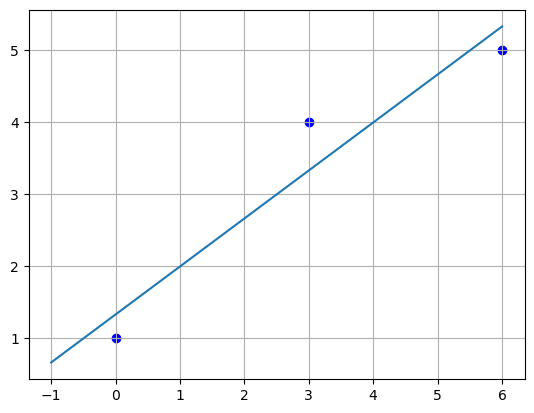

R_Squared: 0.9230769230769231


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def Regression(points):
    # Create the design matrix X and the response vector y
    X = np.ones((len(points), 2))
    y = np.zeros((len(points), 1))
    
    # Fill in the values of X and y from the input points
    for i in range(0, len(points)):
        X[i, 1] = points[i][0]
        y[i, 0] = points[i][1]
    
    # Display the design matrix X and response vector y
    print('X:\n', X)
    print('y:\n', y)
    
    # Calculate the product of the transpose of X and X (P matrix)
    P = X.T @ X
    
    # Calculate the inverse of the P matrix (Q matrix)
    Q = np.linalg.inv(P)
    
    # Calculate the product of the transpose of X and y (R matrix)
    R = X.T @ y
    
    # Calculate the regression coefficients 𝜷 using the normal equation
    𝜷 = Q @ R
    print('𝜷:\n', 𝜷)
    
    # Display the predicted values X𝜷
    print('X𝜷:\n', X @ 𝜷)
    
    return 𝜷

# Sample data points
points = [[0, 1], [3, 4], [6, 5]]
𝜷 = Regression(points)

# Plot the data points and the regression line
plt.figure()
x = [-1, 0, 2, 3, 6]
Y = []
for i in range(0, len(points)):
    plt.scatter(points[i][0], points[i][1], color='blue')

for j in range(0, len(x)):
    g = 𝜷[0, 0] + 𝜷[1, 0] * x[j]
    Y.append(g)
plt.plot(x, Y)
plt.grid()
plt.show()

# Calculate R-squared value
Actual_value = np.array([])
Response_value = np.array([])

for i in range(len(points)):
    Actual_value = np.append(Actual_value, points[i][1])

Predictor = [0, 3, 6]
for j in range(len(Predictor)):
    Response_value = np.append(Response_value, 𝜷[0, 0] + 𝜷[1, 0] * Predictor[j])

# Calculate mean of actual values
mean = np.mean(Actual_value)

# Calculate R-squared using the formula
R_squared = 1 - ((np.sum((Actual_value - Response_value)**2)) / (np.sum((Actual_value - mean)**2)))

print('R_Squared:', R_squared)

## 2 (b):

X:
 [[ 1.  0.  0.]
 [ 1.  3.  9.]
 [ 1.  6. 36.]]
y:
 [[1.]
 [4.]
 [5.]]
𝜷:
 [[ 1.        ]
 [ 1.33333333]
 [-0.11111111]]
X𝜷:
 [[1.]
 [4.]
 [5.]]


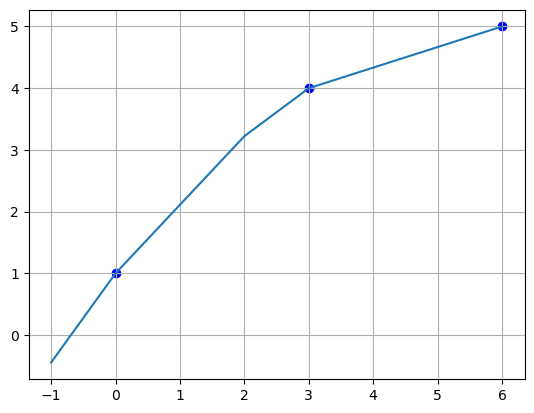

R_Squared: 1.0


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def Regression(points):
    # Create the design matrix X with columns for the constant term, linear term, and quadratic term
    X = np.ones((len(points), 3))
    y = np.zeros((len(points), 1))
    
    # Fill in the values of X and y from the input points
    for i in range(0, len(points)):
        X[i, 1] = points[i][0]  # Linear term
        X[i, 2] = (points[i][0])**2  # Quadratic term
        y[i, 0] = points[i][1]
    
    # Display the design matrix X and response vector y
    print('X:\n', X)
    print('y:\n', y)
    
    # Calculate the product of the transpose of X and X (P matrix)
    P = X.T @ X
    
    # Calculate the inverse of the P matrix (Q matrix)
    Q = np.linalg.inv(P)
    
    # Calculate the product of the transpose of X and y (R matrix)
    R = X.T @ y
    
    # Calculate the regression coefficients 𝜷 using the normal equation
    𝜷 = Q @ R
    print('𝜷:\n', 𝜷)
    
    # Display the predicted values X𝜷
    print('X𝜷:\n', X @ 𝜷)
    
    return 𝜷

# Sample data points
points = [[0, 1], [3, 4], [6, 5]]
𝜷 = Regression(points)

# Plot the data points and the regression curve
plt.figure()
x = [-1, 0, 2, 3, 6]
Y = []
for i in range(0, len(points)):
    plt.scatter(points[i][0], points[i][1], color='blue')

for j in range(0, len(x)):
    g = 𝜷[0, 0] + 𝜷[1, 0] * x[j] + 𝜷[2, 0] * x[j]**2
    Y.append(g)

plt.plot(x, Y)
plt.grid()
plt.show()

# Calculate R-squared value
Actual_value = np.array([])
Response_value = np.array([])

for i in range(0, len(points)):
    Actual_value = np.append(Actual_value, points[i][1])

Predictor = [0, 3, 6]
for j in range(0, len(Predictor)):
    Response_value = np.append(Response_value, 𝜷[0, 0] + 𝜷[1, 0] * Predictor[j] + 𝜷[2, 0] * Predictor[j]**2)

# Calculate mean of actual values
mean = np.mean(Actual_value)

# Calculate R-squared using the formula
R_squared = 1 - ((np.sum((Actual_value - Response_value)**2)) / (np.sum((Actual_value - mean)**2)))

print('R_Squared:', R_squared)


## 2 (c):

[[1 '01-01-2022' 471.2833333]
 [2 '02-01-2022' 472.55]
 [32 '01-02-2022' 471.2833333]
 [33 '02-02-2022' 472.55]
 [60 '01-03-2022' 656.1833333]
 [61 '02-03-2022' 660.25]
 [91 '01-04-2022' 783.05]
 [92 '02-04-2022' 787.1333333]
 [121 '01-05-2022' 900.8833333]
 [122 '02-05-2022' 904.5333333]
 [152 '01-06-2022' 992.9833333]
 [153 '02-06-2022' 994.9166667]
 [182 '01-07-2022' 1007.933333]
 [183 '02-07-2022' 1006.816667]
 [213 '01-08-2022' 935.7333333]
 [214 '02-08-2022' 932.4333333]
 [244 '01-09-2022' 820.8666667]
 [245 '02-09-2022' 816.9166667]
 [274 '01-10-2022' 700.1666667]
 [275 '02-10-2022' 696.1333333]
 [305 '01-11-2022' 578.5833333]
 [306 '02-11-2022' 574.9166667]
 [335 '01-12-2022' 487.1166667]
 [336 '02-12-2022' 485.05]
 [366 '01-01-2023' 471.0166667]
 [367 '02-01-2023' 472.2166667]
 [397 '01-02-2023' 548.1166667]
 [398 '02-02-2023' 551.5833333]
 [425 '01-03-2023' 655.2]
 [426 '02-03-2023' 659.25]
 [456 '01-04-2023' 782.0833333]
 [457 '02-04-2023' 786.15]
 [486 '01-05-2023' 899.9833

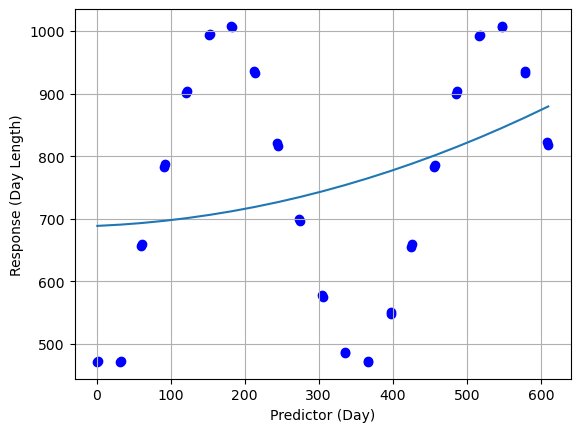

R_Squared: 0.09544526310757495


In [10]:
# QUADRATIC MODEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Regression():
    # Load dataset from CSV file
    dataset = np.array(pd.read_csv('Daylength.csv')) # Day length in this dataset is converted to minutes
    print(dataset)
    
    # Initialize design matrix X and response vector y
    X = np.ones((dataset.shape[0], 3))
    y = np.zeros((dataset.shape[0], 1))
    
    # Fill in the values of X and y from the dataset
    for i in range(0, dataset.shape[0]):
        X[i, 1] = dataset[i][0]  # Linear term
        X[i, 2] = (dataset[i][0])**2  # Quadratic term
        y[i, 0] = dataset[i][2]  # Response variable
        
    # Display the design matrix X and response vector y
    print('X:\n', X)
    print('y:\n', y)
    
    # Calculate the product of the transpose of X and X (P matrix)
    P = X.T @ X
    
    # Calculate the inverse of the P matrix (Q matrix)
    Q = np.linalg.inv(P)
    
    # Calculate the product of the transpose of X and y (R matrix)
    R = X.T @ y
    
    # Calculate the regression coefficients 𝜷 using the normal equation
    𝜷 = Q @ R
    print('𝜷:\n', 𝜷)
    
    # Display the predicted values X𝜷
    print('X𝜷:\n', X @ 𝜷)
    
    return 𝜷

# Perform quadratic regression
𝜷 = Regression()

# Load dataset again for plotting and evaluation
dataset = np.array(pd.read_csv('Daylength.csv'))

print('\nQuadratic Model\n')

# Plot the data points and the quadratic regression curve
plt.figure()
Q_x = np.array(dataset[:, 0])
Q_Y = np.array([])
for i in range(0, dataset.shape[0]):
    plt.scatter(dataset[i][0], dataset[i][2], color='blue')

for j in range(0, len(Q_x)):
    Q_Y = np.append(Q_Y, 𝜷[0, 0] + 𝜷[1, 0] * Q_x[j] + 𝜷[2, 0] * Q_x[j]**2)

plt.plot(Q_x, Q_Y)
plt.xlabel('Predictor (Day)')
plt.ylabel('Response (Day Length)')
plt.grid()
plt.show()

# Evaluate R-squared value for quadratic regression
Q_Actual_value = np.array(dataset[:, 2])
Q_Response_value = np.array([])

Q_Predictor = np.array(dataset[:, 0])
for j in range(0, Q_Predictor.shape[0]):
    Q_Response_value = np.append(Q_Response_value, 𝜷[0, 0] + 𝜷[1, 0] * Q_Predictor[j] + 𝜷[2, 0] * Q_Predictor[j]**2)

Q_mean = np.mean(Q_Actual_value)

Q_R_squared = 1 - ((np.sum((Q_Actual_value - Q_Response_value)**2)) / (np.sum((Q_Actual_value - Q_mean)**2)))

print('R_Squared:', Q_R_squared)


X:
 [[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00]
 [1.00000000e+00 3.20000000e+01 1.02400000e+03 3.27680000e+04]
 [1.00000000e+00 3.30000000e+01 1.08900000e+03 3.59370000e+04]
 [1.00000000e+00 6.00000000e+01 3.60000000e+03 2.16000000e+05]
 [1.00000000e+00 6.10000000e+01 3.72100000e+03 2.26981000e+05]
 [1.00000000e+00 9.10000000e+01 8.28100000e+03 7.53571000e+05]
 [1.00000000e+00 9.20000000e+01 8.46400000e+03 7.78688000e+05]
 [1.00000000e+00 1.21000000e+02 1.46410000e+04 1.77156100e+06]
 [1.00000000e+00 1.22000000e+02 1.48840000e+04 1.81584800e+06]
 [1.00000000e+00 1.52000000e+02 2.31040000e+04 3.51180800e+06]
 [1.00000000e+00 1.53000000e+02 2.34090000e+04 3.58157700e+06]
 [1.00000000e+00 1.82000000e+02 3.31240000e+04 6.02856800e+06]
 [1.00000000e+00 1.83000000e+02 3.34890000e+04 6.12848700e+06]
 [1.00000000e+00 2.13000000e+02 4.53690000e+04 9.66359700e+06]
 [1.00000000e+00 2.14000000e+02 4.57960000e+04 9.80

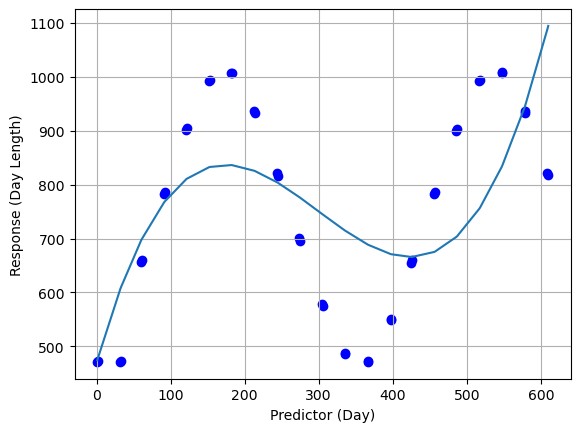

R_Squared: 0.4060425652814097


In [11]:
# CUBIC MODEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Regression():
    # Load dataset from CSV file
    dataset = np.array(pd.read_csv('Daylength.csv')) # Day length in this dataset is converted to minutes
    
    # Initialize design matrix X and response vector y
    X = np.ones((dataset.shape[0], 4))
    y = np.zeros((dataset.shape[0], 1))
    
    # Fill in the values of X and y from the dataset
    for i in range(0, dataset.shape[0]):
        X[i, 1] = dataset[i][0]  # Linear term
        X[i, 2] = (dataset[i][0])**2  # Quadratic term
        X[i, 3] = (dataset[i][0])**3  # Cubic term
        y[i, 0] = dataset[i][2]  # Response variable
        
    # Display the design matrix X and response vector y
    print('X:\n', X)
    print('y:\n', y)
    
    # Calculate the product of the transpose of X and X (P matrix)
    P = X.T @ X
    
    # Calculate the inverse of the P matrix (Q matrix)
    Q = np.linalg.inv(P)
    
    # Calculate the product of the transpose of X and y (R matrix)
    R = X.T @ y
    
    # Calculate the regression coefficients 𝜷 using the normal equation
    𝜷 = Q @ R
    print('𝜷:\n', 𝜷)
    
    # Display the predicted values X𝜷
    print('X𝜷:\n', X @ 𝜷)
    
    return 𝜷

# Perform cubic regression
𝜷 = Regression()

# Load dataset again for plotting and evaluation
dataset = np.array(pd.read_csv('Daylength.csv'))

print('\nCubic Model\n')

# Plot the data points and the cubic regression curve
plt.figure()
C_x = np.array(dataset[:, 0])
C_Y = np.array([])
for i in range(0, dataset.shape[0]):
    plt.scatter(dataset[i][0], dataset[i][2], color='blue')

for j in range(0, len(C_x)):
    C_Y = np.append(C_Y, 𝜷[0, 0] + 𝜷[1, 0] * C_x[j] + 𝜷[2, 0] * C_x[j]**2 + 𝜷[3, 0] * C_x[j]**3)

plt.plot(C_x, C_Y)
plt.xlabel('Predictor (Day)')
plt.ylabel('Response (Day Length)')
plt.grid()
plt.show()

# Evaluate R-squared value for cubic regression
C_Actual_value = np.array(dataset[:, 2])
C_Response_value = np.array([])

C_Predictor = np.array(dataset[:, 0])
for j in range(0, C_Predictor.shape[0]):
    C_Response_value = np.append(C_Response_value, 𝜷[0, 0] + 𝜷[1, 0] * C_Predictor[j] + 𝜷[2, 0] * C_Predictor[j]**2 + 𝜷[3, 0] * C_Predictor[j]**3)

C_mean = np.mean(C_Actual_value)

C_R_squared = 1 - ((np.sum((C_Actual_value - C_Response_value)**2)) / (np.sum((C_Actual_value - C_mean)**2)))

print('R_Squared:', C_R_squared)

A better fit is typically indicated by a greater R-squared value. Thus, the cubic model (second model) against the quadratic model (first model) seems to offer a superior fit to the data based solely on the R-squared values. Moreover, the cubic model's fitted line nearly matches the data points when we look at the scatter plots, whereas the quadratic model's simple curve is seen. These fitted curves/lines also have an impact on the residuals and the response value, which indicates that the quadratic model is less predictive than the cubic model.

X:
 [[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01]
 [1.00000000e+00 3.20000000e+01 1.02400000e+03 3.27680000e+04
  1.04857600e+06]
 [1.00000000e+00 3.30000000e+01 1.08900000e+03 3.59370000e+04
  1.18592100e+06]
 [1.00000000e+00 6.00000000e+01 3.60000000e+03 2.16000000e+05
  1.29600000e+07]
 [1.00000000e+00 6.10000000e+01 3.72100000e+03 2.26981000e+05
  1.38458410e+07]
 [1.00000000e+00 9.10000000e+01 8.28100000e+03 7.53571000e+05
  6.85749610e+07]
 [1.00000000e+00 9.20000000e+01 8.46400000e+03 7.78688000e+05
  7.16392960e+07]
 [1.00000000e+00 1.21000000e+02 1.46410000e+04 1.77156100e+06
  2.14358881e+08]
 [1.00000000e+00 1.22000000e+02 1.48840000e+04 1.81584800e+06
  2.21533456e+08]
 [1.00000000e+00 1.52000000e+02 2.31040000e+04 3.51180800e+06
  5.33794816e+08]
 [1.00000000e+00 1.53000000e+02 2.34090000e+04 3.58157700e+06
  5.47981281e+08]
 [1.00000000e+00 1.82000000e+02 3.31

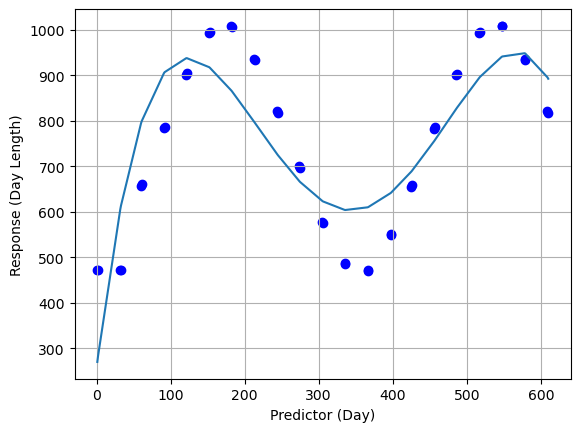

R_Squared: 0.7167175524665357


In [12]:
#QUARTIC MODEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Regression():
    # Load dataset from CSV file
    dataset = np.array(pd.read_csv('Daylength.csv')) # Day length in this dataset is converted to minutes
    
    # Initialize design matrix X and response vector y
    X = np.ones((dataset.shape[0], 5))
    y = np.zeros((dataset.shape[0], 1))
    
    # Fill in the values of X and y from the dataset
    for i in range(0, dataset.shape[0]):
        X[i, 1] = dataset[i][0]  # Linear term
        X[i, 2] = (dataset[i][0])**2  # Quadratic term
        X[i, 3] = (dataset[i][0])**3  # Cubic term
        X[i, 4] = (dataset[i][0])**4  # Quartic term
        y[i, 0] = dataset[i][2]  # Response variable
        
    # Display the design matrix X and response vector y
    print('X:\n', X)
    print('y:\n', y)
    
    # Calculate the product of the transpose of X and X (P matrix)
    P = X.T @ X
    
    # Calculate the inverse of the P matrix (Q matrix)
    Q = np.linalg.inv(P)
    
    # Calculate the product of the transpose of X and y (R matrix)
    R = X.T @ y
    
    # Calculate the regression coefficients 𝜷 using the normal equation
    𝜷 = Q @ R
    print('𝜷:\n', 𝜷)
    
    # Display the predicted values X𝜷
    print('X𝜷:\n', X @ 𝜷)
    
    return 𝜷

# Perform cubic regression
𝜷 = Regression()

# Load dataset again for plotting and evaluation
dataset = np.array(pd.read_csv('Daylength.csv'))

print('\nQuartic Model\n')

# Plot the data points and the cubic regression curve
plt.figure()
q_x = np.array(dataset[:, 0])
q_Y = np.array([])
for i in range(0, dataset.shape[0]):
    plt.scatter(dataset[i][0], dataset[i][2], color='blue')

for j in range(0, len(q_x)):
    q_Y = np.append(q_Y, 𝜷[0, 0] + 𝜷[1, 0] * q_x[j] + 𝜷[2, 0] * q_x[j]**2 + 𝜷[3, 0] * q_x[j]**3 + 𝜷[4, 0] * q_x[j]**4)

plt.plot(q_x, q_Y)
plt.xlabel('Predictor (Day)')
plt.ylabel('Response (Day Length)')
plt.grid()
plt.show()

# Evaluate R-squared value for cubic regression
q_Actual_value = np.array(dataset[:, 2])
q_Response_value = np.array([])

q_Predictor = np.array(dataset[:, 0])
for j in range(0, q_Predictor.shape[0]):
    q_Response_value = np.append(q_Response_value, 𝜷[0, 0] + 𝜷[1, 0] * q_Predictor[j] + 𝜷[2, 0] * q_Predictor[j]**2 + 𝜷[3, 0] * q_Predictor[j]**3 + 𝜷[4, 0] * q_Predictor[j]**4)

q_mean = np.mean(q_Actual_value)

q_R_squared = 1 - ((np.sum((q_Actual_value - q_Response_value)**2)) / (np.sum((q_Actual_value - q_mean)**2)))

print('R_Squared:', q_R_squared)

Upon examining the Quadratic and Cubic Scatter Plots, I saw a pattern of increased R_squared value and better fit to the data points. Thus, the Quartic Model appears to fit even better than the preceding model, the Cubic Model, and its R-squared value is higher as well. It is evident that the fitted line has a closer relationship with the datapoints in the obtained scatter plot. Since the Quartic Model fits the data the best and is the best predictor when compared to the other models, I thus suggest it.